**Najboljši tekmovalci na Mednarodni matematični olimpijadi**
=============================================================

### **Uvod**
Pridobljene podatke bom analiziral, cilj je poiskati najboljše tekmovalce, države, leaderje in deputy leaderje vseh časov.

### **Pregled in uvoz podatkov**

In [183]:
# Uvozimo podatke in knjižnico pandas.
import pandas as pd

tekmovalci = pd.read_csv('obdelani_podatki/tekmovalci.csv')
tekmovanja = pd.read_csv('obdelani_podatki/tekmovanja.csv')
pd.options.display.max_rows = 10

# Ker so bili nekateri podatki NAN jih je bilo treba ročno spremenit v integers.
tekmovalci.id = tekmovalci["id"].astype('Int64')

Pregled vseh podatkov

In [184]:
vsi_podatki = pd.merge(tekmovanja, tekmovalci)
vsi_podatki

,leto,gostiteljica,država,leader,deputy leader,id,ime,p1,p2,p3,p4,p5,p6,vsota,nagrada
0,1959,Romania,Romania,Gheorghe D. Simionescu,NaN,9795,Basarab Nicolescu,unknown,unknown,unknown,unknown,unknown,unknown,37,Gold medal
1,1959,Romania,Romania,Gheorghe D. Simionescu,NaN,9802,Cezar Gheorghe,unknown,unknown,unknown,unknown,unknown,unknown,36,Silver medal
2,1959,Romania,Romania,Gheorghe D. Simionescu,NaN,16084,Cristian Berthaler,unknown,unknown,unknown,unknown,unknown,unknown,36,Silver medal
3,1959,Romania,Romania,Gheorghe D. Simionescu,NaN,16086,Virgil Brişcă,unknown,unknown,unknown,unknown,unknown,unknown,35,Bronze medal
4,1959,Romania,Romania,Gheorghe D. Simionescu,NaN,16087,Mihail Vrăjitoru,unknown,unknown,unknown,unknown,unknown,unknown,33,Bronze medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18651,2019,United Kingdom,United Arab Emirates,Rachad Zaki,Badriya Alshehhi,29197,Maha Sultan Eid Saeed Alketbi,0,0,0,0,0,0,0,NaN
18652,2019,United Kingdom,United Arab Emirates,Rachad Zaki,Badriya Alshehhi,29195,Sara Hasan Ahmed Abdulla Zaid,0,0,0,0,0,0,0,NaN
18653,2019,United Kingdom,United Arab Emirates,Rachad Zaki,Badriya Alshehhi,29191,Ghadeir Mohamed Ali Mohamed Alzeyoudi,0,0,0,0,0,0,0,NaN
18654,2019,United Kingdom,United Arab Emirates,Rachad Zaki,Badriya Alshehhi,29192,Hour Saif Mohamed Saif Almazrouei,0,0,0,0,0,0,0,NaN


 ### **Najvcekrat nastopajoči leader in deputy**
 Tabela prikazuje leaderja, državo in na koliko olimpijadah je prisostoval.

In [185]:
leaders = tekmovanja[["leader", "država", "leto"]].groupby(["leader", "država"])
leaders_vr = leaders.count().sort_values('leto', ascending=False)
leaders_vr["vrstni_red"] = list(range(1,len(leaders_vr)+1))
leaders_vr

,,leto,vrstni_red
leader,država,,
József Pelikán,Hungary,31,1
Matti Lehtinen,Finland,29,2
Endre Hódi,Hungary,27,3
Charles Leytem,Luxembourg,23,4
Claude Deschamps,France,19,5
...,...,...,...
J. B. Tabov,Bulgaria,1,811
Iván Henríquez,Honduras,1,812
Ivan Tonov,Bulgaria,1,813


 Tabela prikazuje deputy leaderja, državo in na koliko olimpijadah je prisostoval.

In [186]:
deputy_leaders = tekmovanja[["deputy leader", "država", "leto"]].groupby(["deputy leader", "država"])
deputy_leaders_vr = deputy_leaders.count().sort_values('leto', ascending=False)
deputy_leaders_vr["vrstni_red"] = list(range(1,len(deputy_leaders_vr)+1))
deputy_leaders_vr

,,leto,vrstni_red
deputy leader,država,,
István Reiman,Hungary,24,1
Sándor Dobos,Hungary,23,2
Gordon Lessells,Ireland,22,3
Maciej Bryński,Poland,15,4
Dimitrios Kontogiannis,Greece,15,5
...,...,...,...
Jennete Lucy D'Mello,Tanzania,1,1106
Jernej Tonejc,Slovenia,1,1107
Jesse Jääsaari,Finland,1,1108


 #### **Kako je s tem v Sloveniji**
 Tabela prikazuje slovenske leaderje in na koliko olimpijadah so prisostovali.

In [187]:
leaders_slo = (tekmovanja[tekmovanja.država == "Slovenia"])[["leader", "leto"]].groupby("leader")
leaders_slo.count().sort_values('leto', ascending=False)


,leto
leader,
Gregor Dolinar,18
Darjo Felda,8
Irena Majcen,1


Tabela prikazuje slovenske deputy leaderje in na koliko olimpijadah so prisostovali.

In [188]:
deputy_leaders_slo = (tekmovanja[tekmovanja.država == "Slovenia"])[["deputy leader", "leto"]].groupby("deputy leader")
deputy_leaders_slo.count().sort_values('leto', ascending=False)

,leto
deputy leader,
Matjaž Željko,12
Irena Majcen,4
Matej Aleksandrov,4
Jure Vogrinc,3
Jakob Jurij Snoj,2
Jernej Tonejc,1
Veno Mramor,1


 ### **Koliko držav je nastopalo posamezna leta?**
 Tabela prikazuje leto in število držav, ki so tekmovale tisto leto.

In [189]:
stevilo_nastopajocih_držav = tekmovanja[["država", "leto"]].groupby("leto")
stevilo_nastopajocih_držav.count().sort_values('država', ascending=False)

,država
leto,
2019,112
2017,111
2016,109
2018,107
2015,104
...,...
1963,8
1962,7
1959,7


 ### **Katere države so največkrat gostile olimpijado?**
 Tabela prikazuje gostiteljico in število olimpijad, ki jih je gostila. Vidimo, da je Slovenija IMO gostila enkrat.

In [190]:
gostiteljice = tekmovanja[["gostiteljica", "leto"]].drop_duplicates().groupby("gostiteljica")
gostiteljice.count().sort_values('leto', ascending=False)

,leto
gostiteljica,
Romania,6
United Kingdom,3
Union of Soviet Socialist Republics,3
Poland,3
Hungary,3
...,...
Japan,1
India,1
Cuba,1


In [191]:
(gostiteljice.count().sort_values('leto', ascending=False)).loc["Slovenia"]

leto    1
Name: Slovenia, dtype: int64

 ### **Katera država je največkrat tekmovala?**
 Tabela prikazuje državo in na koliko olimpijadah je tekmovala. Vidimo, da je Slovenija tekmovala na 27. olimpijadah.

In [192]:
najveckrat_tekmovala = tekmovanja[["država", "leto"]].groupby("država")
najveckrat_tekmovala_vr = najveckrat_tekmovala.count().sort_values('leto', ascending=False)
najveckrat_tekmovala_vr["vrstni_red"] = list(range(1,len(najveckrat_tekmovala_vr)+1))
najveckrat_tekmovala_vr

,leto,vrstni_red
država,,
Bulgaria,60,1
Romania,60,2
Poland,59,3
Hungary,59,4
Sweden,52,5
...,...,...
Laos,1,130
Madagascar,1,131
Mauritania,1,132


In [193]:
najveckrat_tekmovala_vr.loc["Slovenia"]

leto          27
vrstni_red    73
Name: Slovenia, dtype: int64

 ### **Najboljše države vseh časov**
Tabela prikazuje državo in število medalj ter pohval. Sortiranje je kakor na športnih tekmovanjih, kar pomeni, da je ena zlata medalja več kot poljubno število srebrnih in tako naprej. Vidimo, da je Slovenija 75 najboljša država vseh časov.

In [194]:
tekmovalci["Gold medal"] = tekmovalci.nagrada.apply(lambda x: 1 if x == "Gold medal" else 0)
tekmovalci["Silver medal"] = tekmovalci.nagrada.apply(lambda x: 1 if x == "Silver medal" else 0)
tekmovalci["Bronze medal"] = tekmovalci.nagrada.apply(lambda x: 1 if x == "Bronze medal" else 0)
tekmovalci["Honourable mention"] = tekmovalci.nagrada.apply(lambda x: 1 if x == "Honourable mention" else 0)
najboljse_drzave = tekmovalci[["država", "Gold medal", "Silver medal", "Bronze medal", "Honourable mention"]].groupby("država")
najboljse_drzave_vr = najboljse_drzave.sum().sort_values(['Gold medal', 'Silver medal', "Bronze medal", "Honourable mention"], ascending=[False, False, False, False])
najboljse_drzave_vr["vrstni_red"] = list(range(1,len(najboljse_drzave)+1))
najboljse_drzave_vr

,Gold medal,Silver medal,Bronze medal,Honourable mention,vrstni_red
država,,,,,
People's Republic of China,157,35,6,0,1
United States of America,129,112,28,1,2
Russian Federation,99,57,12,0,3
Republic of Korea,79,70,27,7,4
Romania,77,143,105,12,5
...,...,...,...,...,...
Mozambique,0,0,0,0,130
Tanzania,0,0,0,0,131
Turkish Republic of Northern Cyprus,0,0,0,0,132


In [195]:
najboljse_drzave_vr.loc["Slovenia"]

Gold medal             0
Silver medal           6
Bronze medal          36
Honourable mention    60
vrstni_red            75
Name: Slovenia, dtype: int64

### **Najboljši leader**
Tabela prikazuje najboljše leaderje vseh časov.

In [196]:
vsi_podatki = pd.merge(tekmovanja, tekmovalci)
najboljsi_leader = vsi_podatki[["leader", "država", "Gold medal", "Silver medal", "Bronze medal", "Honourable mention"]].groupby(["leader", "država"])
najboljsi_leader_vr = najboljsi_leader.sum().sort_values(['Gold medal', 'Silver medal', "Bronze medal", "Honourable mention"], ascending=[False, False, False, False])
najboljsi_leader_vr["vrstni_red"] = list(range(1,len(najboljsi_leader_vr)+1))
najboljsi_leader_vr

,,Gold medal,Silver medal,Bronze medal,Honourable mention,vrstni_red
leader,država,,,,,
Nazar Agakhanov,Russian Federation,59,37,6,0,1
Yongjin Song,Republic of Korea,43,18,4,1,2
Bin Xiong,People's Republic of China,41,6,1,0,3
József Pelikán,Hungary,40,87,46,9,4
Endre Hódi,Hungary,35,75,51,4,5
...,...,...,...,...,...,...
Thomas Masiwa,Zimbabwe,0,0,0,0,810
Urshinzerengin Sanzhimyatav,Mongolia,0,0,0,0,811
Vidar Thomée,Sweden,0,0,0,0,812


### **Najboljši deputy leader**
Tabela prikazuje najboljše deputy leaderje vseh časov.

In [197]:
najboljsi_d_leader = vsi_podatki[["deputy leader", "država", "Gold medal", "Silver medal", "Bronze medal", "Honourable mention"]].groupby(["deputy leader", "država"])
najboljsi_d_leader_vr = najboljsi_d_leader.sum().sort_values(['Gold medal', 'Silver medal', "Bronze medal", "Honourable mention"], ascending=[False, False, False, False])
najboljsi_d_leader_vr["vrstni_red"] = list(range(1,len(najboljsi_d_leader_vr)+1))
najboljsi_d_leader_vr

,,Gold medal,Silver medal,Bronze medal,Honourable mention,vrstni_red
deputy leader,država,,,,,
Dmitry Tereshin,Russian Federation,33,24,3,0,1
István Reiman,Hungary,30,69,41,1,2
Sándor Dobos,Hungary,26,67,35,8,3
Po-Shen Loh,United States of America,23,7,0,0,4
Zhigang Feng,People's Republic of China,22,1,1,0,5
...,...,...,...,...,...,...
Sílvia Barbeiro,Portugal,0,0,0,0,1105
Tryfon Pnevmatikos,Cyprus,0,0,0,0,1106
Udayanga Chandimal de Silva Udayanga Chandimal de Silva,Sri Lanka,0,0,0,0,1107


### **Najboljši tekmovaleci**
Tabela prikazuje najboljše tekmovalce vseh časov.

In [198]:
vsi_tekmovalci = vsi_podatki[["ime", "država", "Gold medal", "Silver medal", "Bronze medal", "Honourable mention"]].groupby(["ime", "država"])
vsi_tekmovalci_vr = vsi_tekmovalci.sum().sort_values(['Gold medal', 'Silver medal', "Bronze medal", "Honourable mention"], ascending=[False, False, False, False])
vsi_tekmovalci_vr["vrstni_red"] = list(range(1,len(vsi_tekmovalci_vr)+1))
vsi_tekmovalci_vr

,,Gold medal,Silver medal,Bronze medal,Honourable mention,vrstni_red
ime,država,,,,,
Zhuo Qun (Alex) Song,Canada,5,0,1,0,1
Teodor von Burg,Serbia,4,1,1,0,2
Lisa Sauermann,Germany,4,1,0,0,3
Nipun Pitimanaaree,Thailand,4,1,0,0,4
Christian Reiher,Germany,4,0,1,0,5
...,...,...,...,...,...,...
Ēriks Dobelis,Latvia,0,0,0,0,12769
Ēriks Gopaks,Latvia,0,0,0,0,12770
Ēriks Vilunas,Latvia,0,0,0,0,12771


Kdo pa so najboljši tekmovalci v Sloveniji.

In [199]:
vsi_tekmovalci_vr.iloc[vsi_tekmovalci_vr.index.get_level_values('država') == "Slovenia"]

,,Gold medal,Silver medal,Bronze medal,Honourable mention,vrstni_red
ime,država,,,,,
Luka Horjak,Slovenia,0,2,1,0,1337
Gašper Zadnik,Slovenia,0,1,1,0,1846
Irena Majcen,Slovenia,0,1,1,0,1882
Marko Čmrlec,Slovenia,0,1,1,0,1952
Matjaž Berčič,Slovenia,0,1,0,1,2160
...,...,...,...,...,...,...
Sašo Živanovič,Slovenia,0,0,0,0,12106
Sergej Omladič,Slovenia,0,0,0,0,12133
Tadej Novak,Slovenia,0,0,0,0,12330


Samo kot zanimivost poglejmo kdo so ljudje z največ pohvalami.

In [200]:
pohvale = vsi_podatki[["ime", "država", "Honourable mention"]].groupby(["ime", "država"])
pohvale_kon = pohvale.sum().sort_values("Honourable mention", ascending=False)
pohvale_kon

Honourable mention
ime                        država                         
?                          Poland                        4
                           Romania                       4
Matjaž Leonardis           Slovenia                      4
Ruwimal Yasantha Pathiraja Sri Lanka                     4
Ka Chon Ieong              Macau                         3
...                                                    ...
Arunas Seputis             Lithuania                     0
Jonathan Potts             Australia                     0
Jonathan Ramachandran      Malaysia                      0
Jonathan Santos Wong       Philippines                   0
?                          Algeria                       0

[12773 rows x 1 columns]

Kako pa je s pohvalam v Sloveniji?

In [201]:
nova6.iloc[nova6.index.get_level_values('država') == "Slovenia"]

,,Honourable mention
ime,država,
Matjaž Leonardis,Slovenia,4
Andraž Maier,Slovenia,3
Žiga Krajnik,Slovenia,3
Amadej Kristjan Kocbek,Slovenia,3
Juan Gabriel Kostelec,Slovenia,2
...,...,...
Irena Majcen,Slovenia,0
Ivo List,Slovenia,0
Jure Vogrinc,Slovenia,0


### **Najtežje naloge**
Tabela prikazuje povprečno število točk pri posamezni nalogi posameznega leta.

In [202]:
naloge = vsi_podatki[["leto", "p1", "p2", "p3", "p4", "p5", "p6"]][vsi_podatki.leto >= 2000]
naloge.p1=naloge.p1.astype('int32')
naloge.p2=naloge.p2.astype('int32')
naloge.p3=naloge.p3.astype('int32')
naloge.p4=naloge.p4.astype('int32')
naloge.p5=naloge.p5.astype('int32')
naloge.p6=naloge.p6.astype('int32')
naloge_kon = naloge.groupby("leto").mean().round(2)
naloge_kon

,p1,p2,p3,p4,p5,p6
leto,,,,,,
2000,4.10,2.77,0.66,3.18,1.63,1.05
2001,3.64,1.55,0.88,3.23,2.73,0.78
2002,3.45,3.56,0.59,3.90,2.27,0.41
2003,3.56,2.30,0.40,4.63,1.61,0.58
2004,4.60,2.76,1.01,4.08,2.51,1.26
...,...,...,...,...,...,...
2015,4.31,1.36,0.65,4.79,1.51,0.36
2016,5.27,2.03,0.25,4.74,1.68,0.81
2017,5.94,2.30,0.04,5.03,0.97,0.29


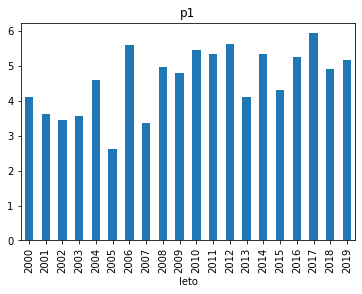

In [203]:
naloge_kon["p1"].plot.bar(title="p1")

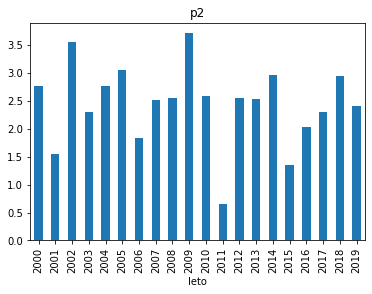

In [204]:
naloge_kon["p2"].plot.bar(title="p2")

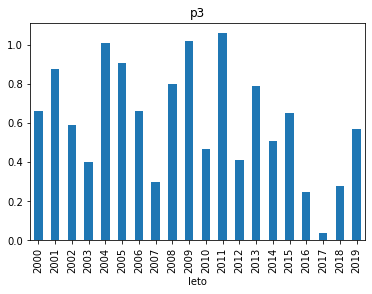

In [205]:
naloge_kon["p3"].plot.bar(title="p3")

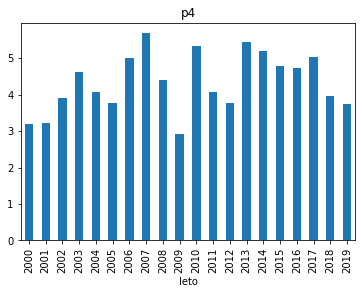

In [206]:
naloge_kon["p4"].plot.bar(title="p4")

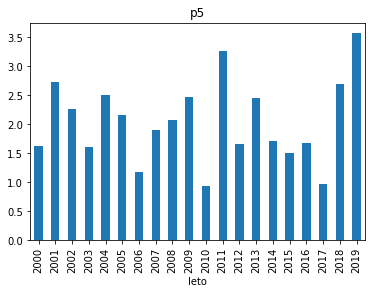

In [207]:
naloge_kon["p5"].plot.bar(title="p5")

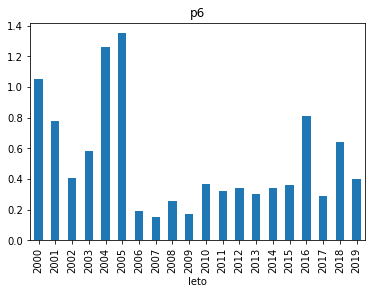

In [208]:
naloge_kon["p6"].plot.bar(title="p6")

Grafi so zanimivi, če približno poznamo kako tekmovanje izgleda. Tekmuje se dva dni, vsak dan pa se rešuje tri naloge, ki naraščajo po težavnosti. Tako sta prva in četrta naloga najlažji in tretja ter šesta najtežji.

### **Zaključek**
Vsi cilji so bili doseženi. Podatki so predvsem zanimivi, če vemo kako IMO deluje. Ugotovimo lahko, da smo Slovenci nekako povprečni, najboljše države pa so Kitajska, ZDA, Koreja in Rusija.